In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

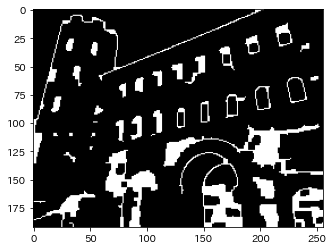

In [65]:
# Edge
img = cv2.imread("../assets/thorino.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 300, apertureSize=3)
kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap="gray")

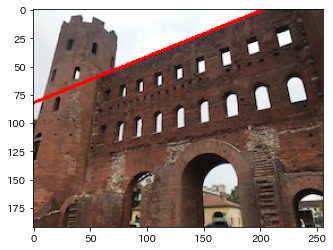

In [67]:
# Draw Line
img2 = img.copy()
lines = cv2.HoughLines(closing,1,np.pi/180,10)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img2,(x1,y1),(x2,y2),(0,0,255),2)
    
plt.imshow(img2[:,:,::-1])

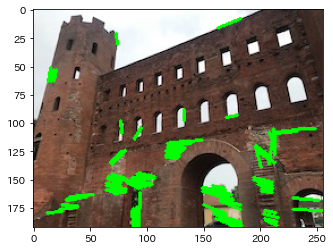

In [71]:
# Hough Line Probability
minLineLength = 120
maxLineGap = 10
# Draw Line
img3 = img.copy()
lines = cv2.HoughLinesP(closing, 1, np.pi/180, 10, minLineLength,maxLineGap)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img3, (x1,y1), (x2,y2), (0,255,0), 2)

plt.imshow(img3[:,:,::-1])

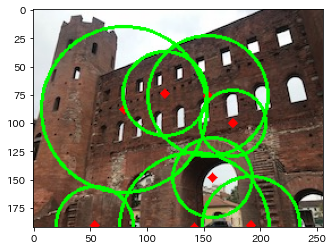

In [72]:
#  Hough Circle Probability
img4 = img.copy()
circles = cv2.HoughCircles(closing, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))
# Draw Circle
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img4,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img4,(i[0],i[1]),2,(0,0,255),3)
    plt.imshow(img4[:,:,::-1])